In [4]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
from scipy import sparse
from tqdm import tqdm

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

data_dir = Path('./input/AI4Code')

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaConfig, RobertaModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")
model.to(device)

In [3]:
device

device(type='cuda')

In [5]:
NUM_TRAIN = 1000

#preprocess.py
def read_notebook(path):
    return (
        pd.read_json(
            path,
            dtype={'cell_type': 'category', 'source': 'str'})
        .assign(id=path.stem)
        .rename_axis('cell_id')
    )

# 리스트 내 확장자가 json인 파일 import
paths_train = list((data_dir / 'train').glob('*.json'))[:NUM_TRAIN]
# 읽어온 notebook을 리스트 형태로 저장
notebooks_train = [
    read_notebook(path) for path in tqdm(paths_train, desc='Train NBs')
]

# pd.dataframe 형태로 저장 
df = (
    pd.concat(notebooks_train)
    .set_index('id', append=True)
    .swaplevel() # 인덱스의 기준값을 변경해줌 
    .sort_index(level='id', sort_remaining=False)
)

df

Train NBs: 100%|█████████████████████████████| 1000/1000 [00:03<00:00, 307.71it/s]


cell_type                                                                                                                   source
id             cell_id                                                                                                                                    
000a2f5243e1ca 1d968d84      code                                                                                  import pandas as pd\nimport numpy as np
               5774aca9      code                                                                                           train=pd.read_csv('train.csv')
               2ddb979d      code                                                                                                             train.head()
               dc18005d      code                                                                                                     train=train.dropna()
               3c7d2db1      code                                                                                             x=train.drop('label',axis=1)
...                           ...                                                                                                                      ...
ff9e97995c0fd1 8704f1b3      code  from sklearn.ensemble import RandomForestClassifier\nRFC = RandomForestClassifier(random_state=42)\nRFC.fit(X,y)\ny_...
               644da0b1      code       submission=pd.DataFrame({"label":y_pred,"actual":y})\nsubmission.to_csv("submission.csv", index=False)\nsubmission
               f1b9d756      code                                                         from IPython.display import FileLink\nFileLink('submission.csv')
               08b7cd21      code                                                                           <a href="./submission.csv"> Download File </a>
               3b74013d  markdown                                                                           <a href="./submission.csv"> Download File </a>

[45767 rows x 2 columns]

In [10]:
#test
# 일반적인 index가 아닌 multi_index 구조
df.index[0:3]

MultiIndex([('000a2f5243e1ca', '1d968d84'),
            ('000a2f5243e1ca', '5774aca9'),
            ('000a2f5243e1ca', '2ddb979d')],
           names=['id', 'cell_id'])

In [5]:
#test
# 샘플데이터(notebook) 확인
# 노트북은 코드와 Markdown 순서가 정렬되어있지 않음(disordered)
nb_id = df.index.unique('id')[3]
print('Notebook:', nb_id)

print("The disordered notebook:")
nb = df.loc[nb_id, :]
display(nb)
print()

Notebook: 007575a98f3827
The disordered notebook:


,cell_type,source
cell_id,,
1aa185dc,code,# Install the fastai v2 dataset\n\n!pip uninstall fastai -y\n!pip install /kaggle/input/fast-v2-offline/dataclasses-...
b479000f,code,"train = pd.read_json('../input/stanford-covid-vaccine/train.json',lines=True)\n\ntest = pd.read_json('../input/stanf..."
fb4aaf0b,code,train_data = []\nfor mol_id in train['id'].unique():\n sample_data = train.loc[train['id'] == mol_id]\n sample...
023b7179,code,test_data = []\nfor mol_id in test['id'].unique():\n sample_data = test.loc[test['id'] == mol_id]\n sample_seq...
26dc4277,code,"# label_encoding\nsequence_encmap = {'A': 0, 'G' : 1, 'C' : 2, 'U' : 3}\nstructure_encmap = {'.' : 0, '(' : 1, ')' :..."
57f6a97e,code,"not_use_cols = ['id', 'id_seqpos']\nfeatures = [c for c in test_data.columns if c not in not_use_cols]\ntargets = ['..."
bf720d00,code,cat_names = features\ncont_names = []
8ead914e,code,"# cat_names = ['cp_type', 'cp_time', 'cp_dose']\n# cont_names = [c for c in train_x.columns if c not in cat_names an..."
0d07a0b4,code,"y_names = ['reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C']"


In [4]:
# Train 데이터(notebook)의 order 순서가 적혀있는 데이터(train_orders.csv) import
# 여기서의 id는 notebook 단위

#preprocess.py -2
df_orders = pd.read_csv(
    data_dir / 'train_orders.csv',
    index_col='id',
    squeeze=True,
).str.split()  # cell_id가 텍스트로 붙어있음, 띄어쓰기 단위로 끊어서 리스트화

print(df_orders.shape)
df_orders.head(2)

/tmp/ipykernel_65752/979864248.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df_orders = pd.read_csv(


(139256,)


id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...
Name: cell_order, dtype: object

In [6]:
#test
# 위에서 확인했던 notebook을 train_order.csv를 활용해
# cell 재정렬 후 결과 확인 (실제 복윈되어야 하는 notebook output)

cell_order = df_orders.loc[nb_id]

print("The ordered notebook:")
nb.loc[cell_order, :]

The ordered notebook:


,cell_type,source
cell_id,,
ac194590,markdown,"Reference from https://www.kaggle.com/t88take/openvaccine-simple-lgb-baseline/notebook,\nhttps://www.kaggle.com/sure..."
1aa185dc,code,# Install the fastai v2 dataset\n\n!pip uninstall fastai -y\n!pip install /kaggle/input/fast-v2-offline/dataclasses-...
b479000f,code,"train = pd.read_json('../input/stanford-covid-vaccine/train.json',lines=True)\n\ntest = pd.read_json('../input/stanf..."
fb4aaf0b,code,train_data = []\nfor mol_id in train['id'].unique():\n sample_data = train.loc[train['id'] == mol_id]\n sample...
023b7179,code,test_data = []\nfor mol_id in test['id'].unique():\n sample_data = test.loc[test['id'] == mol_id]\n sample_seq...
26dc4277,code,"# label_encoding\nsequence_encmap = {'A': 0, 'G' : 1, 'C' : 2, 'U' : 3}\nstructure_encmap = {'.' : 0, '(' : 1, ')' :..."
57f6a97e,code,"not_use_cols = ['id', 'id_seqpos']\nfeatures = [c for c in test_data.columns if c not in not_use_cols]\ntargets = ['..."
bf720d00,code,cat_names = features\ncont_names = []
8ead914e,code,"# cat_names = ['cp_type', 'cp_time', 'cp_dose']\n# cont_names = [c for c in train_x.columns if c not in cat_names an..."


In [7]:
#test
cell_order

['ac194590',
 '1aa185dc',
 'b479000f',
 'fb4aaf0b',
 '023b7179',
 '26dc4277',
 '57f6a97e',
 'bf720d00',
 '8ead914e',
 '0d07a0b4',
 '59957336',
 '1ba4a84d',
 'ce5a8a6c',
 '071a99e4',
 'ba0e35c0',
 'a7e8a57e',
 '6fd5ad7a',
 'c33a392e',
 '84cf5973',
 '93f679ab',
 'd7c45290',
 'efeafcb9',
 '7c2b65e3',
 'fddaa507',
 'aaa6f84a',
 'f35516dc']

In [8]:
# 위 결과처럼
# 정렬되어있지 않는 Train 데이터(notebook)의 cell 순서(rank)를 구하는 함수 설정

#preprocess.py -3
def get_ranks(base, derived):
    return [base.index(d) for d in derived]

cell_ranks = get_ranks(cell_order, list(nb.index))
nb.insert(0, 'rank', cell_ranks)

In [9]:
#test
nb.index

Index(['1aa185dc', 'b479000f', 'fb4aaf0b', '023b7179', '26dc4277', '57f6a97e', 'bf720d00', '8ead914e', '0d07a0b4', '59957336', '1ba4a84d', 'ce5a8a6c', '071a99e4', 'ba0e35c0',
       'a7e8a57e', '6fd5ad7a', 'c33a392e', '84cf5973', '93f679ab', 'd7c45290', 'efeafcb9', '7c2b65e3', 'fddaa507', 'aaa6f84a', 'f35516dc', 'ac194590'],
      dtype='object', name='cell_id')

In [10]:
#test
#셀 순서
cell_ranks

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0]

In [11]:
#test
nb

,rank,cell_type,source
cell_id,,,
1aa185dc,1,code,# Install the fastai v2 dataset\n\n!pip uninstall fastai -y\n!pip install /kaggle/input/fast-v2-offline/dataclasses-...
b479000f,2,code,"train = pd.read_json('../input/stanford-covid-vaccine/train.json',lines=True)\n\ntest = pd.read_json('../input/stanf..."
fb4aaf0b,3,code,train_data = []\nfor mol_id in train['id'].unique():\n sample_data = train.loc[train['id'] == mol_id]\n sample...
023b7179,4,code,test_data = []\nfor mol_id in test['id'].unique():\n sample_data = test.loc[test['id'] == mol_id]\n sample_seq...
26dc4277,5,code,"# label_encoding\nsequence_encmap = {'A': 0, 'G' : 1, 'C' : 2, 'U' : 3}\nstructure_encmap = {'.' : 0, '(' : 1, ')' :..."
57f6a97e,6,code,"not_use_cols = ['id', 'id_seqpos']\nfeatures = [c for c in test_data.columns if c not in not_use_cols]\ntargets = ['..."
bf720d00,7,code,cat_names = features\ncont_names = []
8ead914e,8,code,"# cat_names = ['cp_type', 'cp_time', 'cp_dose']\n# cont_names = [c for c in train_x.columns if c not in cat_names an..."
0d07a0b4,9,code,"y_names = ['reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C']"


In [12]:
# 전체 Trainset의 rank 구함

#preprocess.py -4
df_orders_ = df_orders.to_frame().join(
    df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
    how='right',
)

ranks = {}
for id_, cell_order, cell_id in df_orders_.itertuples():
    ranks[id_] = {'cell_id': cell_id, 'rank': get_ranks(cell_order, cell_id)}

df_ranks = (
    pd.DataFrame
    .from_dict(ranks, orient='index')
    .rename_axis('id')
    .apply(pd.Series.explode)
    .set_index('cell_id', append=True)
)

df_ranks

rank
id             cell_id      
000a2f5243e1ca 1d968d84    1
               5774aca9    2
               2ddb979d    3
               dc18005d    4
               3c7d2db1    5
...                      ...
ff9e97995c0fd1 8704f1b3    2
               644da0b1    3
               f1b9d756    4
               08b7cd21    5
               3b74013d    6

[45767 rows x 1 columns]

In [13]:
#test
df.head(2)

cell_type                                   source
id             cell_id                                                    
000a2f5243e1ca 1d968d84      code  import pandas as pd\nimport numpy as np
               5774aca9      code           train=pd.read_csv('train.csv')

In [14]:
#test
df.reset_index('cell_id').groupby('id')['cell_id'].apply(list)

id
000a2f5243e1ca    [1d968d84, 5774aca9, 2ddb979d, dc18005d, 3c7d2db1, 2b434221, 573fbd25, 18e0b577, b0e8de50, adf7c730, 272894fc, 61c25...
003f36ab2c577d    [386d31f0, 16435878, f4bb282f, 4cc5ee5a, 215ec8c0, 3f201013, eb645be7, 1d664ca8, 5c545af1, 05bc949b, a3f4e6bc, 3e143...
00754d19099028    [63f89ce4, ae62e216, f55e249f, 0b7d3f74, 4128205b, a443945c, 8a3bba75, 3d314299, e38f915b, 07418512, d7022a87, 86623...
007575a98f3827    [1aa185dc, b479000f, fb4aaf0b, 023b7179, 26dc4277, 57f6a97e, bf720d00, 8ead914e, 0d07a0b4, 59957336, 1ba4a84d, ce5a8...
007dcc1e2fe20d    [b006094c, 1205dc38, 44ffa9e8, 9281b68d, 922792a0, 7144cfef, 99510916, 1e3c4f62, 7f1f0d96, 40d2e38e, 90398330, 3e1c1...
                                                                           ...                                                           
fe43174eb67ecf    [abf068fa, 0f810c59, 012efb78, 1e884f6a, c0cd3f83, 3c9d8b40, 8ede1cae, 607f8958, 881ac9f0, 10bea006, 0cf8f9cd, 974ed...
fe75b783710d1a    [4d60b707, 6d

In [15]:
#test
df_orders.head(2)

id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...
Name: cell_order, dtype: object

In [16]:
#test
df_orders_

,cell_order,cell_id
id,,
000a2f5243e1ca,"[31080d42, 1d968d84, 5774aca9, 2ddb979d, dc18005d, 3c7d2db1, 2b434221, 573fbd25, 18e0b577, b0e8de50, adf7c730, f7a66...","[1d968d84, 5774aca9, 2ddb979d, dc18005d, 3c7d2db1, 2b434221, 573fbd25, 18e0b577, b0e8de50, adf7c730, 272894fc, 61c25..."
003f36ab2c577d,"[42435be9, da99f684, 386d31f0, 82dfbe9a, 16435878, 6d31400d, f4bb282f, 3e1430c4, 4cc5ee5a, db8c69de, 215ec8c0, 3f201...","[386d31f0, 16435878, f4bb282f, 4cc5ee5a, 215ec8c0, 3f201013, eb645be7, 1d664ca8, 5c545af1, 05bc949b, a3f4e6bc, 3e143..."
00754d19099028,"[63f89ce4, ae62e216, 37622cd1, f55e249f, 0b7d3f74, 4128205b, a443945c, 687344c2, 8a3bba75, 3d314299, e38f915b, 07418...","[63f89ce4, ae62e216, f55e249f, 0b7d3f74, 4128205b, a443945c, 8a3bba75, 3d314299, e38f915b, 07418512, d7022a87, 86623..."
007575a98f3827,"[ac194590, 1aa185dc, b479000f, fb4aaf0b, 023b7179, 26dc4277, 57f6a97e, bf720d00, 8ead914e, 0d07a0b4, 59957336, 1ba4a...","[1aa185dc, b479000f, fb4aaf0b, 023b7179, 26dc4277, 57f6a97e, bf720d00, 8ead914e, 0d07a0b4, 59957336, 1ba4a84d, ce5a8..."
007dcc1e2fe20d,"[b006094c, 1205dc38, 44ffa9e8, 9281b68d, 922792a0, 7144cfef, 99510916, 1e3c4f62, 7f1f0d96, 40d2e38e, 90398330, 3e1c1...","[b006094c, 1205dc38, 44ffa9e8, 9281b68d, 922792a0, 7144cfef, 99510916, 1e3c4f62, 7f1f0d96, 40d2e38e, 90398330, 3e1c1..."
...,...,...
fe43174eb67ecf,"[d5cfc0cf, 6566d473, 2f2a52ec, abf068fa, 6e9df100, 0f810c59, 012efb78, 1e884f6a, c0cd3f83, 3c9d8b40, 8ede1cae, 607f8...","[abf068fa, 0f810c59, 012efb78, 1e884f6a, c0cd3f83, 3c9d8b40, 8ede1cae, 607f8958, 881ac9f0, 10bea006, 0cf8f9cd, 974ed..."
fe75b783710d1a,"[3a02aeb1, 4d60b707, 8999ea84, 6d17cb5f, 8cdc5936, 2d646d78, af2febab, de31610b, 77eba393, ea452a41, ccdde7db, e0a26...","[4d60b707, 6d17cb5f, 2d646d78, de31610b, ea452a41, e0a263d5, a13568a1, 891921c8, 0e275ec8, af2febab, 8cdc5936, 77eba..."
fea63a81a6b27c,"[0ab60c8b, 6ffee140, f6c0fd6d, fbcae564, d82ca245, 66647514, ec2b96f1, 18491c6f, 3e95b279, 2f511204, 5634686d, bf20b...","[6ffee140, f6c0fd6d, fbcae564, d82ca245, 66647514, ec2b96f1, 18491c6f, 3e95b279, 2f511204, 5634686d, bf20bbf5, 38efb..."


In [17]:
# ancestor & parent_id 데이터 가져옴

#preprocess.py -5
df_ancestors = pd.read_csv(data_dir / 'train_ancestors.csv', index_col='id')
df_ancestors.head(2)

,ancestor_id,parent_id
id,,
00001756c60be8,945aea18,NaN
00015c83e2717b,aa2da37e,317b65d12af9df


In [18]:
# train set에 ancestor & parent info merge

#preprocess.py -6
df = df.reset_index().merge(df_ranks, on=["id", "cell_id"]).merge(df_ancestors, on=["id"])
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id
0,000a2f5243e1ca,1d968d84,code,import pandas as pd\nimport numpy as np,1,ae9b5889,NaN
1,000a2f5243e1ca,5774aca9,code,train=pd.read_csv('train.csv'),2,ae9b5889,NaN
2,000a2f5243e1ca,2ddb979d,code,train.head(),3,ae9b5889,NaN
3,000a2f5243e1ca,dc18005d,code,train=train.dropna(),4,ae9b5889,NaN
4,000a2f5243e1ca,3c7d2db1,code,"x=train.drop('label',axis=1)",5,ae9b5889,NaN
...,...,...,...,...,...,...,...
45762,ff9e97995c0fd1,8704f1b3,code,"from sklearn.ensemble import RandomForestClassifier\nRFC = RandomForestClassifier(random_state=42)\nRFC.fit(X,y)\ny_...",2,4eb69823,NaN
45763,ff9e97995c0fd1,644da0b1,code,"submission=pd.DataFrame({""label"":y_pred,""actual"":y})\nsubmission.to_csv(""submission.csv"", index=False)\nsubmission",3,4eb69823,NaN
45764,ff9e97995c0fd1,f1b9d756,code,from IPython.display import FileLink\nFileLink('submission.csv'),4,4eb69823,NaN
45765,ff9e97995c0fd1,08b7cd21,code,"<a href=""./submission.csv""> Download File </a>",5,4eb69823,NaN


# 최종 train DataFrame

#df 에 포함된 노트북은 50,000개

#노트북 내 cell 개수까지 모두 합쳐서 2,293,280개

#df_orders 는 모든 노트북에 대한 셀 순서대로를 포함하고 있음

In [19]:
# rank / 각 id마다 cell의 개수 
# 해당 값을 학습 시에는 y LABEL로 활용함
#   - Cell 전체를 0~1로 보았을 때, 해당 Cell이 몇%정도에 위치하고 있는지에 대한 값

#preprocess.py -7
df["pct_rank"] = df["rank"] / df.groupby("id")["cell_id"].transform("count")
# df["pct_rank"].hist(bins=10)
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,000a2f5243e1ca,1d968d84,code,import pandas as pd\nimport numpy as np,1,ae9b5889,NaN,0.022222
1,000a2f5243e1ca,5774aca9,code,train=pd.read_csv('train.csv'),2,ae9b5889,NaN,0.044444
2,000a2f5243e1ca,2ddb979d,code,train.head(),3,ae9b5889,NaN,0.066667
3,000a2f5243e1ca,dc18005d,code,train=train.dropna(),4,ae9b5889,NaN,0.088889
4,000a2f5243e1ca,3c7d2db1,code,"x=train.drop('label',axis=1)",5,ae9b5889,NaN,0.111111
...,...,...,...,...,...,...,...,...
45762,ff9e97995c0fd1,8704f1b3,code,"from sklearn.ensemble import RandomForestClassifier\nRFC = RandomForestClassifier(random_state=42)\nRFC.fit(X,y)\ny_...",2,4eb69823,NaN,0.285714
45763,ff9e97995c0fd1,644da0b1,code,"submission=pd.DataFrame({""label"":y_pred,""actual"":y})\nsubmission.to_csv(""submission.csv"", index=False)\nsubmission",3,4eb69823,NaN,0.428571
45764,ff9e97995c0fd1,f1b9d756,code,from IPython.display import FileLink\nFileLink('submission.csv'),4,4eb69823,NaN,0.571429
45765,ff9e97995c0fd1,08b7cd21,code,"<a href=""./submission.csv""> Download File </a>",5,4eb69823,NaN,0.714286


## Train / Valid 분리

In [20]:
#preprocess.py -8
from sklearn.model_selection import GroupShuffleSplit

NVALID = 0.1  # size of validation set

splitter = GroupShuffleSplit(n_splits=1, test_size=NVALID, random_state=0)
train_ind, val_ind = next(splitter.split(df, groups=df["ancestor_id"]))

train_df = df.loc[train_ind].reset_index(drop=True)
val_df = df.loc[val_ind].reset_index(drop=True)

train_df.shape, val_df.shape

((41485, 8), (4282, 8))

In [21]:
#test
# ancestor_id를 key값 비율 확인
print(df.ancestor_id.nunique(), train_df.ancestor_id.nunique(), val_df.ancestor_id.nunique())
print(train_df.ancestor_id.nunique()/df.ancestor_id.nunique(), val_df.ancestor_id.nunique()/df.ancestor_id.nunique())

997 897 100
0.8996990972918756 0.10030090270812438


In [22]:
val_df.head()

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,003f36ab2c577d,386d31f0,code,import numpy as np\nimport pandas as pd\nimport tensorflow as tf\n# import tf2_0_baseline_w_bert as tf2baseline # ol...,2,8508be37,3bde8d65a3508b,0.095238
1,003f36ab2c577d,16435878,code,def del_all_flags(FLAGS):\n flags_dict = FLAGS._flags()\n keys_list = [keys for keys in flags_dict]\n for k...,4,8508be37,3bde8d65a3508b,0.190476
2,003f36ab2c577d,f4bb282f,code,bert_config = modeling.BertConfig.from_json_file(FLAGS.bert_config_file)\n\ntf2baseline.validate_flags_or_throw(bert...,6,8508be37,3bde8d65a3508b,0.285714
3,003f36ab2c577d,4cc5ee5a,code,"test_answers_df = pd.read_json(""/kaggle/working/predictions.json"")",8,8508be37,3bde8d65a3508b,0.380952
4,003f36ab2c577d,215ec8c0,code,"def create_short_answer(entry):\n # if entry[""short_answers_score""] < 1.5:\n # return """"\n \n answer...",10,8508be37,3bde8d65a3508b,0.47619


In [23]:
# train & Valid 중 Markdown 부분만 분리해서 생성

#preprocess.py -9
train_df_mark = train_df[train_df["cell_type"] == "markdown"].reset_index(drop=True)
val_df_mark = val_df[val_df["cell_type"] == "markdown"].reset_index(drop=True)

In [24]:
#preprocess.py -10
train_df_mark.to_csv("./data_1k/train_mark_2.csv", index=False)
val_df_mark.to_csv("./data_1k/val_mark_2.csv", index=False)
val_df.to_csv("./data_1k/val_2.csv", index=False)
train_df.to_csv("./data_1k/train_2.csv", index=False)

# sample_cells 와 get_features

In [25]:
# Additional code cells

#preprocess.py -11
def clean_code(cell):
    return str(cell).replace("\\n", "\n")


def sample_cells(cells, n):
    cells = [clean_code(cell) for cell in cells]
    if n >= len(cells):
        return [cell[:200] for cell in cells]
    else: #code cell 개수가 지정된 n 보다 넘어가면
        results = []
        step = len(cells) / n #ex) 25/20 = 1.25 씩 뛰어 넘으면서 셀을 추가
        idx = 0
        while int(np.round(idx)) < len(cells):
            results.append(cells[int(np.round(idx))])
            idx += step
        assert cells[0] in results # 마지막 셀 꼭 추가
        if cells[-1] not in results:
            results[-1] = cells[-1]
        return results


def get_features(df):
    features = dict()
    df = df.sort_values("rank").reset_index(drop=True)
    for idx, sub_df in tqdm(df.groupby("id")): # 각 노트북에 대한 정보 저장
        features[idx] = dict()
        total_md = sub_df[sub_df.cell_type == "markdown"].shape[0]
        code_sub_df = sub_df[sub_df.cell_type == "code"]
        total_code = code_sub_df.shape[0]
        codes = sample_cells(code_sub_df.source.values, 20) #20개로 제한
        features[idx]["total_code"] = total_code
        features[idx]["total_md"] = total_md
        features[idx]["codes"] = codes
    return features

### val_fts 예시

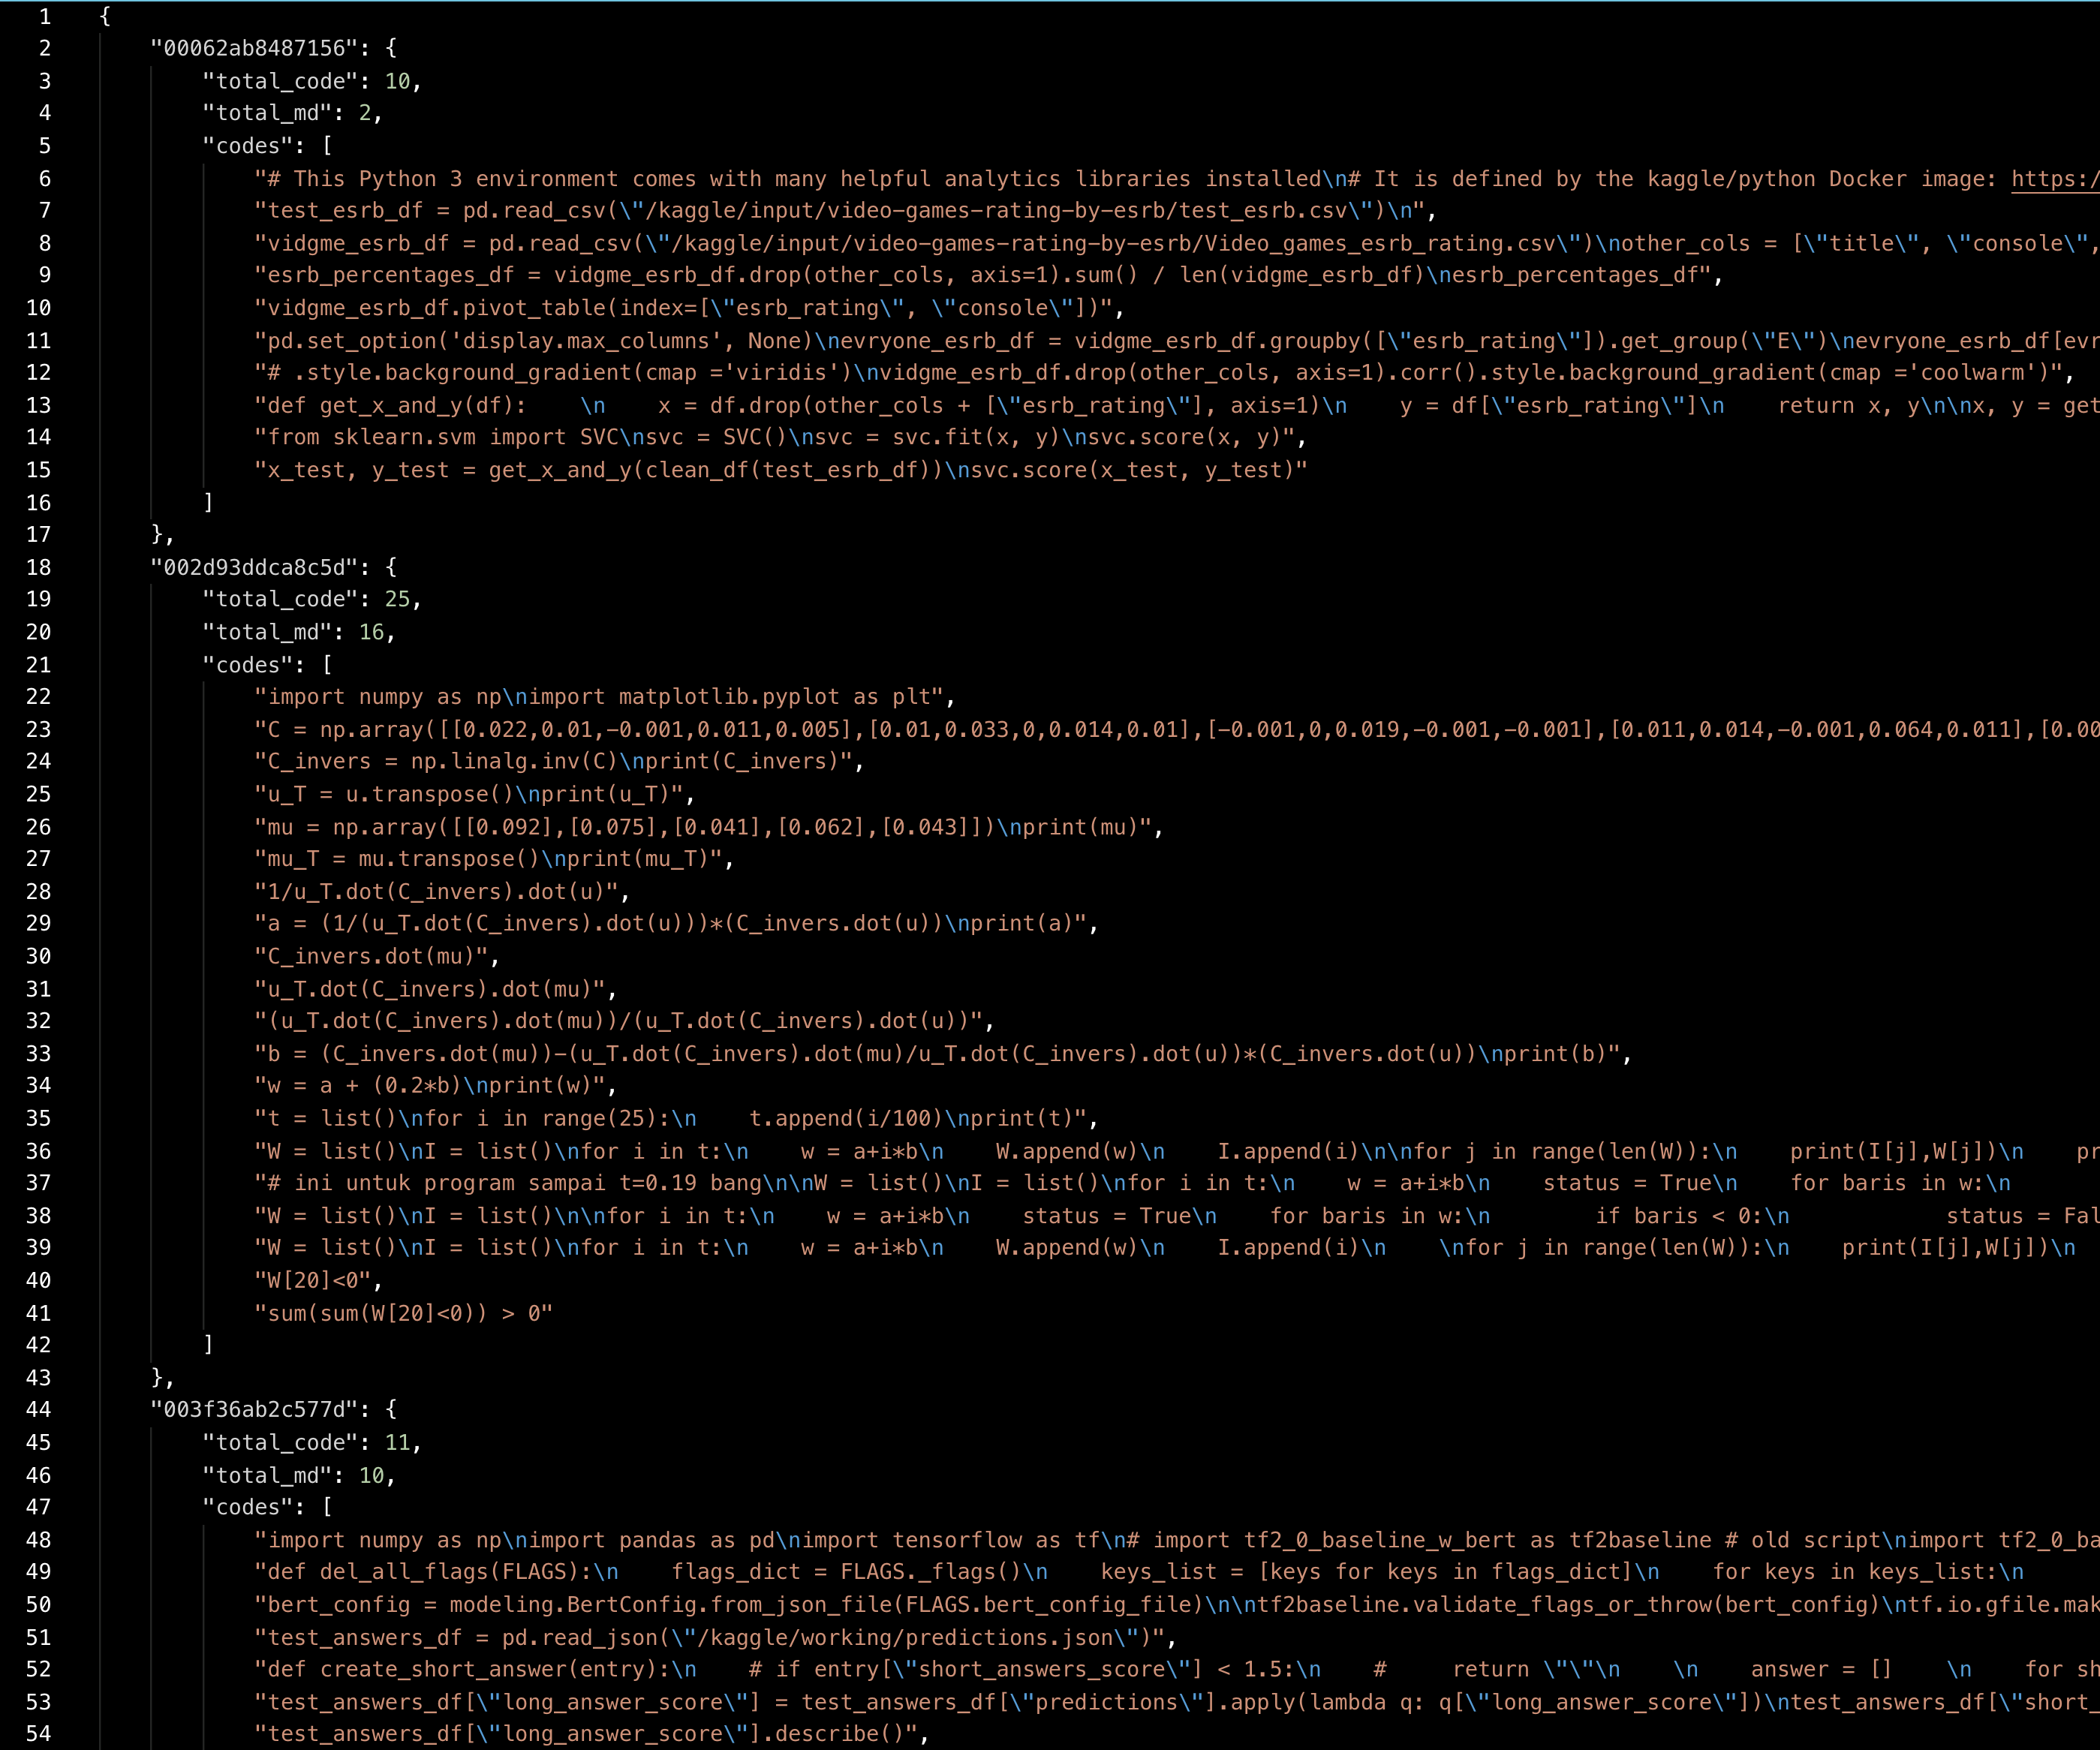

In [32]:
for idx, sub_df in tqdm(df.sort_values("rank").reset_index(drop=True).groupby("id")):
    code_sub_df = sub_df[sub_df.cell_type == "code"]
    display(code_sub_df)
    print(code_sub_df.source.values,'\n\n\n')
    print(sample_cells(code_sub_df.source.values, 20))
    break
#     codes = sample_cells(code_sub_df.source.values, 20)


  0%|                                                                                               | 0/20000 [00:00<?, ?it/s]

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,00062ab8487156,dcad687f,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,0,de362dd8,NaN,0.0
38838,00062ab8487156,a2e1fc80,code,"test_esrb_df = pd.read_csv(""/kaggle/input/video-games-rating-by-esrb/test_esrb.csv"")\n",1,de362dd8,NaN,0.083333
56794,00062ab8487156,7d977ee8,code,"vidgme_esrb_df = pd.read_csv(""/kaggle/input/video-games-rating-by-esrb/Video_games_esrb_rating.csv"")\nother_cols = [...",2,de362dd8,NaN,0.166667
79802,00062ab8487156,45a82a59,code,"esrb_percentages_df = vidgme_esrb_df.drop(other_cols, axis=1).sum() / len(vidgme_esrb_df)\nesrb_percentages_df",3,de362dd8,NaN,0.25
94786,00062ab8487156,cbbc326a,code,"vidgme_esrb_df.pivot_table(index=[""esrb_rating"", ""console""])",4,de362dd8,NaN,0.333333
137740,00062ab8487156,004d0eee,code,"pd.set_option('display.max_columns', None)\nevryone_esrb_df = vidgme_esrb_df.groupby([""esrb_rating""]).get_group(""E"")...",6,de362dd8,NaN,0.5
152177,00062ab8487156,b9344b3d,code,"# .style.background_gradient(cmap ='viridis')\nvidgme_esrb_df.drop(other_cols, axis=1).corr().style.background_gradi...",7,de362dd8,NaN,0.583333
159413,00062ab8487156,51709b61,code,"def get_x_and_y(df): \n x = df.drop(other_cols + [""esrb_rating""], axis=1)\n y = df[""esrb_rating""]\n retu...",8,de362dd8,NaN,0.666667
192764,00062ab8487156,979a5b9a,code,"from sklearn.svm import SVC\nsvc = SVC()\nsvc = svc.fit(x, y)\nsvc.score(x, y)",9,de362dd8,NaN,0.75
215265,00062ab8487156,af2b0426,code,"x_test, y_test = get_x_and_y(clean_df(test_esrb_df))\nsvc.score(x_test, y_test)",10,de362dd8,NaN,0.833333


  0%|                                                                                               | 0/20000 [00:00<?, ?it/s]

['# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session'
 'test_esrb_df = pd.read_csv("/kaggle/input/vi

In [34]:
# cnt = 0
for idx, sub_df in tqdm(df.sort_values("rank").reset_index(drop=True).groupby("id")):
    code_sub_df = sub_df[sub_df.cell_type == "code"]
#     cnt += 1
    if code_sub_df['id'].unique() == '002d93ddca8c5d':
        display(code_sub_df)
        print(code_sub_df.source.values,'\n\n\n')
        print(sample_cells(code_sub_df.source.values, 20))
        break
#     codes = sample_cells(code_sub_df.source.values, 20)


  0%|                                                                                     | 1/20000 [00:00<1:35:58,  3.47it/s]

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
39326,002d93ddca8c5d,b6afdfdb,code,import numpy as np\nimport matplotlib.pyplot as plt,1,d0cda2e5,NaN,0.02439
93742,002d93ddca8c5d,522b1069,code,"C = np.array([[0.022,0.01,-0.001,0.011,0.005],[0.01,0.033,0,0.014,0.01],[-0.001,0,0.019,-0.001,-0.001],[0.011,0.014,...",4,d0cda2e5,NaN,0.097561
115078,002d93ddca8c5d,f9a6802d,code,C_invers = np.linalg.inv(C)\nprint(C_invers),5,d0cda2e5,NaN,0.121951
155599,002d93ddca8c5d,c215d32e,code,"u = np.array([[1],[1],[1],[1],[1]])\nprint(u)",7,d0cda2e5,NaN,0.170732
162966,002d93ddca8c5d,d7b802ab,code,u_T = u.transpose()\nprint(u_T),8,d0cda2e5,NaN,0.195122
211041,002d93ddca8c5d,d93dc64c,code,"mu = np.array([[0.092],[0.075],[0.041],[0.062],[0.043]])\nprint(mu)",10,d0cda2e5,NaN,0.243902
231616,002d93ddca8c5d,25e523bd,code,mu_T = mu.transpose()\nprint(mu_T),11,d0cda2e5,NaN,0.268293
289291,002d93ddca8c5d,830054c7,code,u_T.dot(C_invers).dot(u),15,d0cda2e5,NaN,0.365854
331344,002d93ddca8c5d,f581cf16,code,1/u_T.dot(C_invers).dot(u),17,d0cda2e5,NaN,0.414634
366914,002d93ddca8c5d,e94e648e,code,a = (1/(u_T.dot(C_invers).dot(u)))*(C_invers.dot(u))\nprint(a),19,d0cda2e5,NaN,0.463415


  0%|                                                                                       | 9/20000 [00:00<11:08, 29.91it/s]

['import numpy as np\nimport matplotlib.pyplot as plt'
 'C = np.array([[0.022,0.01,-0.001,0.011,0.005],[0.01,0.033,0,0.014,0.01],[-0.001,0,0.019,-0.001,-0.001],[0.011,0.014,-0.001,0.064,0.011],[0.005,0.01,-0.001,0.011,0.045]])\nprint(C)'
 'C_invers = np.linalg.inv(C)\nprint(C_invers)'
 'u = np.array([[1],[1],[1],[1],[1]])\nprint(u)'
 'u_T = u.transpose()\nprint(u_T)'
 'mu = np.array([[0.092],[0.075],[0.041],[0.062],[0.043]])\nprint(mu)'
 'mu_T = mu.transpose()\nprint(mu_T)' 'u_T.dot(C_invers).dot(u)'
 '1/u_T.dot(C_invers).dot(u)'
 'a = (1/(u_T.dot(C_invers).dot(u)))*(C_invers.dot(u))\nprint(a)'
 'C_invers.dot(mu)' 'u_T.dot(C_invers).dot(mu)'
 '(u_T.dot(C_invers).dot(mu))/(u_T.dot(C_invers).dot(u))'
 '(u_T.dot(C_invers).dot(mu)/u_T.dot(C_invers).dot(u))*(C_invers.dot(u))'
 'b = (C_invers.dot(mu))-(u_T.dot(C_invers).dot(mu)/u_T.dot(C_invers).dot(u))*(C_invers.dot(u))\nprint(b)'
 'w = a + (0.2*b)\nprint(w)'
 't = list()\nfor i in range(25):\n    t.append(i/100)\nprint(t)'
 's = list()\nfo

In [26]:
#preprocess.py -12
val_fts = get_features(val_df)
json.dump(val_fts, open("./data_1k/val_fts.json","wt"))
train_fts = get_features(train_df)
json.dump(train_fts, open("./data_1k/train_fts.json","wt"))

100%|███████████████████████████████████████████████████████████████████████████████| 899/899 [00:00<00:00, 1548.43it/s]


## metric

In [27]:
#metric.py
from bisect import bisect

def count_inversions(a):
    inversions = 0
    sorted_so_far = []
    for i, u in enumerate(a):
        j = bisect(sorted_so_far, u)
        inversions += i - j
        sorted_so_far.insert(j, u)
    return inversions


def kendall_tau(ground_truth, predictions):
    total_inversions = 0
    total_2max = 0  # twice the maximum possible inversions across all instances
    for gt, pred in zip(ground_truth, predictions):
        ranks = [gt.index(x) for x in pred]  # rank predicted order in terms of ground truth
        total_inversions += count_inversions(ranks)
        n = len(gt)
        total_2max += n * (n - 1)
    return 1 - 4 * total_inversions / total_2max


In [28]:
def read_notebook(path):
    return (
        pd.read_json(
            path,
            dtype={'cell_type': 'category', 'source': 'str'})
        .assign(id=path.stem)
        .rename_axis('cell_id')
    )

In [29]:
data_dir = Path('./input/AI4Code')

In [30]:
paths_test = list((data_dir / 'test').glob('*.json'))

notebooks_test = [
    read_notebook(path) for path in tqdm(paths_test, desc='Test NBs')
]

test_df = (
    pd.concat(notebooks_test)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
).reset_index()

# 각 노트북 내에서 code셀&md셀 각각 번호가 0부터 매겨짐
test_df["rank"] = test_df.groupby(["id", "cell_type"]).cumcount() #cumcount(): 각 그룹의 각 항목에 0부터 번호를 매김!
test_df["pred"] = test_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)

Test NBs: 100%|██████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 287.67it/s]


In [31]:
test_df

,id,cell_id,cell_type,source,rank,pred
0,0009d135ece78d,ddfd239c,code,"import numpy as np # linear algebra\nimport pandas as pd # data processing,\nimport matplotlib.pyplot as plt\nfrom s...",0,0.142857
1,0009d135ece78d,c6cd22db,code,df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')\ndf,1,0.285714
2,0009d135ece78d,1372ae9b,code,"numerical_data = df.loc[:, ~df.columns.isin(['id', ""diagnosis""])]\n\nlabels = df[""diagnosis""].factorize(['B','M'])[0...",2,0.428571
3,0009d135ece78d,90ed07ab,code,"def comparison_plot_maker(data_1, data_2, name, column_name_1, column_name_2):\n # Scaling Data for testing\n ...",3,0.571429
4,0009d135ece78d,7f388a41,code,"# Ploting data with different columns\n#####################################\ncomparison_plot_maker(numerical_data[""...",4,0.714286
...,...,...,...,...,...,...
84,0010a919d60e4f,d3f5c397,markdown,We have 177 rows with missing `Age` and 687 rows with missing `Cabin`,34,1.000000
85,0028856e09c5b7,012c9d02,code,"sns.set()\nsns.pairplot(data1, 2.5)\nplt.show(); = size",0,0.333333
86,0028856e09c5b7,d22526d1,code,"types----------"")\n# is uniques----------"")\n# plt\nimport mis_val +\n = #https://pandas.pydata.org/pandas...",1,0.666667
87,0028856e09c5b7,3ae7ece3,code,"#correlation avoid map\nf,ax verbose 20), 18))\nsns.heatmap(data1.corr(), the annot=True, ; informations bins=50, '....",2,1.000000


In [32]:
test_fts = get_features(test_df)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1316.79it/s]


In [33]:
#test
test_fts

{'0009d135ece78d': {'total_code': 7,
  'total_md': 6,
  'codes': ['import numpy as np # linear algebra\nimport pandas as pd # data processing,\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nfrom s',
   "df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')\ndf",
   'numerical_data = df.loc[:, ~df.columns.isin([\'id\', "diagnosis"])]\n\nlabels = df["diagnosis"].factorize([\'B\',\'M\'])[0]\n\nheader_labels = pd.DataFrame(data=labels, columns=["diagnosis"])',
   'def comparison_plot_maker(data_1, data_2, name, column_name_1, column_name_2):\n    # Scaling Data for testing\n    # data_1 = scale(data_1)\n    # data_2 = scale(data_2)\n\n    range =  np.random.randn(le',
   '# Ploting data with different columns\n#####################################\ncomparison_plot_maker(numerical_data["radius_mean"], numerical_data["radius_worst"], "Mean Radius vs Worst Radius", "Mean Ra',
   '# Scaling Data\nscal

In [71]:
#model.py
from tqdm import tqdm
import sys, os
from transformers import AutoModel, AutoTokenizer
import torch.nn.functional as F
import torch.nn as nn
import torch

class MarkdownModel(nn.Module):
    def __init__(self, model_path):
        super(MarkdownModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_path)
        self.top = nn.Linear(769, 1)
        
    def forward(self, ids, mask, fts):
        x = self.model(ids, mask)[0]
        x = self.top(torch.cat((x[:, 0, :], fts),1))
        return x


#dataset.py
from torch.utils.data import DataLoader, Dataset

class MarkdownDataset(Dataset):

    def __init__(self, df, model_name_or_path, total_max_len, md_max_len, fts):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.md_max_len = md_max_len
        self.total_max_len = total_max_len  # maxlen allowed by model config
        self.tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
        self.fts = fts

    def __getitem__(self, index):
        row = self.df.iloc[index]

        inputs = self.tokenizer.encode_plus(
            row.source,
            None,
            add_special_tokens=True,
            max_length=self.md_max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        code_inputs = self.tokenizer.batch_encode_plus(
            [str(x) for x in self.fts[row.id]["codes"]],
            add_special_tokens=True,
            max_length=35,
            padding="max_length",
            truncation=True
        )
        n_md = self.fts[row.id]["total_md"]
        n_code = self.fts[row.id]["total_md"]
        if n_md + n_code == 0:
            fts = torch.FloatTensor([0])
        else:
            fts = torch.FloatTensor([n_md / (n_md + n_code)])

        ids = inputs['input_ids']
        for x in code_inputs['input_ids']:
            ids.extend(x[:-1])
        ids = ids[:self.total_max_len]
        if len(ids) != self.total_max_len:
            ids = ids + [self.tokenizer.pad_token_id, ] * (self.total_max_len - len(ids))
        ids = torch.LongTensor(ids)

        mask = inputs['attention_mask']
        for x in code_inputs['attention_mask']:
            mask.extend(x[:-1])
        mask = mask[:self.total_max_len]
        if len(mask) != self.total_max_len:
            mask = mask + [self.tokenizer.pad_token_id, ] * (self.total_max_len - len(mask))
        mask = torch.LongTensor(mask)

        assert len(ids) == self.total_max_len

        return ids, mask, fts, torch.FloatTensor([row.pct_rank])

    def __len__(self):
        return self.df.shape[0]

In [35]:
val_df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,003f36ab2c577d,386d31f0,code,import numpy as np\nimport pandas as pd\nimport tensorflow as tf\n# import tf2_0_baseline_w_bert as tf2baseline # ol...,2,8508be37,3bde8d65a3508b,0.095238
1,003f36ab2c577d,16435878,code,def del_all_flags(FLAGS):\n flags_dict = FLAGS._flags()\n keys_list = [keys for keys in flags_dict]\n for k...,4,8508be37,3bde8d65a3508b,0.190476
2,003f36ab2c577d,f4bb282f,code,bert_config = modeling.BertConfig.from_json_file(FLAGS.bert_config_file)\n\ntf2baseline.validate_flags_or_throw(bert...,6,8508be37,3bde8d65a3508b,0.285714
3,003f36ab2c577d,4cc5ee5a,code,"test_answers_df = pd.read_json(""/kaggle/working/predictions.json"")",8,8508be37,3bde8d65a3508b,0.380952
4,003f36ab2c577d,215ec8c0,code,"def create_short_answer(entry):\n # if entry[""short_answers_score""] < 1.5:\n # return """"\n \n answer...",10,8508be37,3bde8d65a3508b,0.47619
...,...,...,...,...,...,...,...,...
4277,fde8f812985cff,6697fb80,code,from sklearn.neighbors import KNeighborsRegressor\nknn = KNeighborsRegressor(n_neighbors = 5)\nknn_model = knn.fit(X...,15,871c53bf,NaN,0.882353
4278,fde8f812985cff,2ce4b883,code,"from sklearn.ensemble import RandomForestRegressor\nrf = RandomForestRegressor()\nrf_model = rf.fit(X_train, y_train...",16,871c53bf,NaN,0.941176
4279,fde8f812985cff,d96d682b,markdown,### So we have the task of predicting the revenue of the movies and the numerical features given are the cost in mak...,3,871c53bf,NaN,0.176471
4280,fde8f812985cff,beec62fd,markdown,## Model Building,12,871c53bf,NaN,0.705882


In [5]:
from transformers import AutoModel, AutoTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

model_name_or_path = 'microsoft/codebert-base'

fts = json.load(open('./data_1k/val_fts.json'))
val_df = pd.read_csv('./data_1k/val_mark.csv').drop("parent_id", axis=1).dropna().reset_index(drop=True)

md_max_len = 64
total_max_len = 512
batch_size = 8
accumulation_steps = 4
epochs = 5
n_workers = 8

df = val_df.reset_index(drop=True)
md_max_len = md_max_len
total_max_len = total_max_len  # maxlen allowed by model config
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
fts = fts


row = val_df.iloc[0]

inputs = tokenizer.encode_plus(
    row.source,
    None,
    add_special_tokens=True,
    max_length=md_max_len,
    padding="max_length",
    return_token_type_ids=True,
    truncation=True
)
code_inputs = tokenizer.batch_encode_plus(
    [str(x) for x in fts[row.id]["codes"]],
    add_special_tokens=True,
    max_length=35,
    padding="max_length",
    truncation=True
)
n_md = fts[row.id]["total_md"]
n_code = fts[row.id]["total_code"]
if n_md + n_code == 0:
    fts = torch.FloatTensor([0])
else:
    fts = torch.FloatTensor([n_md / (n_md + n_code)])

ids = inputs['input_ids']
print(ids)


[0, 49629, 978, 6, 52, 1004, 22209, 37466, 19047, 4, 40962, 12905, 88, 10, 22209, 10936, 12478, 4, 49079, 12905, 2870, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [73]:
print(inputs)

{'input_ids': [0, 49629, 978, 6, 52, 1004, 22209, 37466, 19047, 4, 40962, 12905, 88, 10, 22209, 10936, 12478, 4, 49079, 12905, 2870, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [62]:
print(fts)

tensor([0.4762])


In [74]:
# print(code_inputs['input_ids'])
for x in code_inputs['input_ids']:
    print(x[:-1])
#     print(len(x))
    break

[0, 41975, 295, 35187, 25, 46446, 50118, 41975, 23387, 281, 25, 181, 417, 50118, 41975, 7281, 368, 19322, 25, 47724, 50118, 10431, 6595, 47724, 176, 1215, 288, 1215, 15609, 7012, 1215, 605, 1215, 6747]


In [6]:
for x in code_inputs['input_ids']:
    ids.extend(x[:-1])
ids = ids[:total_max_len]
if len(ids) != total_max_len:
    ids = ids + [tokenizer.pad_token_id, ] * (total_max_len - len(ids))
ids = torch.LongTensor(ids)
print(ids)

mask = inputs['attention_mask']
for x in code_inputs['attention_mask']:
    mask.extend(x[:-1])
mask = mask[:total_max_len]
if len(mask) != total_max_len:
    mask = mask + [tokenizer.pad_token_id, ] * (total_max_len - len(mask))
mask = torch.LongTensor(mask)

assert len(ids) == total_max_len

# return ids, mask, fts, torch.FloatTensor([row.pct_rank])
print(ids, mask, fts, torch.FloatTensor([row.pct_rank]))


tensor([    0, 49629,   978,     6,    52,  1004, 22209, 37466, 19047,     4,
        40962, 12905,    88,    10, 22209, 10936, 12478,     4, 49079, 12905,
         2870,     4,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     0, 41975,   295, 35187,    25, 46446,
        50118, 41975, 23387,   281,    25,   181,   417, 50118, 41975,  7281,
          368, 19322,    25, 47724, 50118, 10431,  6595, 47724,   176,  1215,
          288,  1215, 15609,  7012,  1215,   605,  1215,  6747,     0,  9232,
         2424,  1215,  1250,  1215, 46760,  1640, 46435,   104,  3256, 50118,
         1437,  1437,  1437,  9287,  1215, 25867,  5457,  8854,  3450,   104,
        48030, 46760, 43048, 50118,  1437,  1437,  1437, 10654, 

In [54]:
model_path = 'microsoft/codebert-base'
self_model = AutoModel.from_pretrained(model_path)
self_top = nn.Linear(769, 1)

self_model(ids, mask)[0]

# def forward(self, ids, mask, fts):
#         x = self.model(ids, mask)[0]
#         x = self.top(torch.cat((x[:, 0, :], fts),1))
#         return x

ValueError: not enough values to unpack (expected 2, got 1)

# test 시작!

In [40]:
model_name_or_path = 'microsoft/codebert-base'

In [41]:
# args = parser.parse_args()

In [42]:
import os

os.makedirs("./outputs", exist_ok=True)
# data_dir = Path('./input/')


In [43]:
train_df_mark = pd.read_csv('./data/train_mark_2.csv').drop("parent_id", axis=1).dropna().reset_index(drop=True)
train_fts = json.load(open('./data/train_fts_2.json'))
val_df_mark = pd.read_csv('./data/val_mark_2.csv').drop("parent_id", axis=1).dropna().reset_index(drop=True)
val_fts = json.load(open('./data/val_fts_2.json'))
val_df = pd.read_csv('./data/val_2.csv')

In [44]:
print(train_df_mark.shape)

(280477, 7)


### 조정 부분(by 로건)

In [13]:
train_data_start_point = 24321
train_data_num = 15000

valid_data_start_point = 4321
valid_data_num = 2500

In [14]:
train_sample_mark_id = train_df_mark.id.unique().tolist()[train_data_start_point:train_data_start_point+train_data_num]
# train_sample_mark_id = train_df_mark.id.unique().tolist()[121:191]
train_df_mark = train_df_mark[train_df_mark['id'].isin(train_sample_mark_id)].reset_index(drop=True)

In [15]:
train_df_mark.shape

(231185, 7)

# 

In [21]:
print(val_df_mark.shape)

(78077, 7)


In [17]:
# val_sample_mark_id = val_df_mark.id.unique().tolist()[4321:9321]
val_sample_mark_id = val_df_mark.id.unique().tolist()[valid_data_start_point:valid_data_start_point+valid_data_num]
val_df_mark = val_df_mark[val_df_mark['id'].isin(val_sample_mark_id)].reset_index(drop=True)

In [18]:
val_df_mark.shape

(10881, 7)

### 조정 부분 끝

In [ ]:
# df_orders 정의

In [45]:
md_max_len = 64
total_max_len = 512
batch_size = 8
accumulation_steps = 4
epochs = 5
n_workers = 8


train_ds = MarkdownDataset(train_df_mark, model_name_or_path=model_name_or_path, md_max_len=md_max_len,
                           total_max_len=total_max_len, fts=train_fts)
val_ds = MarkdownDataset(val_df_mark, model_name_or_path=model_name_or_path, md_max_len=md_max_len,
                         total_max_len=total_max_len, fts=val_fts)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=n_workers,
                          pin_memory=False, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=n_workers,
                        pin_memory=False, drop_last=False)

In [46]:
def read_data(data):
    return tuple(d.to(device) for d in data[:-1]), data[-1].to(device)


def validate(model, val_loader):
    model.eval()

    tbar = tqdm(val_loader, file=sys.stdout)

    preds = []
    labels = []

    with torch.no_grad():
        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            with torch.cuda.amp.autocast():
                pred = model(*inputs)

            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())

    return np.concatenate(labels), np.concatenate(preds)

from transformers import AutoModel, AutoTokenizer, AdamW, get_linear_schedule_with_warmup
def train(model, train_loader, val_loader, epochs):
    np.random.seed(0)
    # Creating optimizer and lr schedulers
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

    num_train_optimization_steps = int(epochs * len(train_loader) / accumulation_steps)
    optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5,
                      correct_bias=False)  # To reproduce BertAdam specific behavior set correct_bias=False
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0.05 * num_train_optimization_steps,
                                                num_training_steps=num_train_optimization_steps)  # PyTorch scheduler

    criterion = torch.nn.L1Loss()
    scaler = torch.cuda.amp.GradScaler()

    for e in range(epochs):
        model.train()
        tbar = tqdm(train_loader, file=sys.stdout)
        loss_list = []
        preds = []
        labels = []

        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            with torch.cuda.amp.autocast():
                pred = model(*inputs)
                loss = criterion(pred, target)
            scaler.scale(loss).backward()
            if idx % accumulation_steps == 0 or idx == len(tbar) - 1:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
                scheduler.step()

            loss_list.append(loss.detach().cpu().item())
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())

            avg_loss = np.round(np.mean(loss_list), 4)

            tbar.set_description(f"Epoch {e + 1} Loss: {avg_loss} lr: {scheduler.get_last_lr()}")

        y_val, y_pred = validate(model, val_loader)
        val_df["pred"] = val_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)
        val_df.loc[val_df["cell_type"] == "markdown", "pred"] = y_pred
        y_dummy = val_df.sort_values("pred").groupby('id')['cell_id'].apply(list)
        print("Preds score", kendall_tau(df_orders.loc[y_dummy.index], y_dummy))
        torch.save(model.state_dict(), "./outputs/model.bin")

    return model, y_pred


In [47]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [48]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())

True
1
A100-SXM4-40GB MIG 1g.5gb


In [49]:
device

device(type='cuda')

In [50]:
model = MarkdownModel(model_name_or_path)
# model = model.to(device)
# model, y_pred = train(model, train_loader, val_loader, epochs=epochs)


In [51]:
import gc

gc.collect()
torch.cuda.empty_cache()

In [52]:
model = model.to(device)


In [53]:
model, y_pred = train(model, train_loader, val_loader, epochs=epochs)


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|                                                                                         | 0/35059 [00:01<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 4.75 GiB total capacity; 3.05 GiB already allocated; 4.00 MiB free; 3.10 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
def predict(model_path, ckpt_path):
    model = MarkdownModel(model_path)
    model = model.cuda()
    model.eval()
    model.load_state_dict(torch.load(ckpt_path))
    BS = 32
    NW = 8
    MAX_LEN = 64
    test_df["pct_rank"] = 0
    test_ds = MarkdownDataset(test_df[test_df["cell_type"] == "markdown"].reset_index(drop=True), md_max_len=64,total_max_len=512, model_name_or_path=model_path, fts=test_fts)
    test_loader = DataLoader(test_ds, batch_size=BS, shuffle=False, num_workers=NW,
                              pin_memory=False, drop_last=False)
    _, y_test = validate(model, test_loader)
    return y_test

In [77]:
model_path = "./input/codebert-base/"
ckpt_path = "./outputs/model.bin"


In [ ]:
y_test_2 = predict(model_path, ckpt_path)

In [ ]:
# y_test = (y_test_1 + y_test_2)/2
y_test = y_test_2

In [ ]:
test_df.loc[test_df["cell_type"] == "markdown", "pred"] = y_test

In [ ]:
sub_df = test_df.sort_values("pred").groupby("id")["cell_id"].apply(lambda x: " ".join(x)).reset_index()
sub_df.rename(columns={"cell_id": "cell_order"}, inplace=True)
sub_df.head()

In [ ]:
sub_df.to_csv("submission.csv", index=False)